## ML HW5
### fs1520 Fu Shang

### 2. From Scores to Conditional Probabilities
#### 2.1

$$E_{y}[\ell(yf(x))|x]=\int_{y}P[\ell(yf(x))|x]\ell(yf(x))=P(y=1|x)\ell(f(x))+P(y=-1|x)\ell(-f(x))$$
Considering $\pi(x)=P(y=1|x)$,
$$E_{y}[\ell(yf(x))|x]=\pi(x)\ell(f(x))+(1-\pi(x))\ell(-f(x))$$

#### 2.2 

Since $f^*(x)=argmin_\hat{y}E_{y}[l(y\hat{y})|x]$,

for any fixed $x$, $\frac{\partial{E_y}}{\partial{\hat{y}}}=0$ when $\hat{y}$ reaches $f^*(x)$, for any x.

Considering $E_y$ and $\ell{(yf(x))}$, write $P=\pi{(x)}$ and $\hat{y}=f(x)$, we get:
$$\frac{\partial{E_y}}{\partial{\hat{y}}}=-Pe^{-\hat{y}}+(1-P)e^{\hat{y}}=0$$
$$e^{2\hat{y}}=\frac{P}{1-P}$$
$$\hat{y}=\frac{1}{2}ln(\frac{P}{1-P})$$
$$f^{*}(x)=\frac{1}{2}ln(\frac{\pi(x)}{1-\pi(x)})$$
Transform the equation above, we can get:

$$\pi(x)=\frac{1}{1+e^{-2f^{*}(x)}}$$

#### 2.3

Since $f^*(x)=argmin_\hat{y}E_{y}[l(y\hat{y})|x]$,

for any fixed $x$, $\frac{\partial{E_y}}{\partial{\hat{y}}}=0$ when $\hat{y}$ reaches $f^*(x)$, for any x.

Considering $E_y$ and $\ell{(yf(x))}$, write $P=\pi{(x)}$ and $\hat{y}=f(x)$, we get:
$$\frac{\partial{E_y}}{\partial{\hat{y}}}=-P\frac{1}{1+e^{\hat{y}}}+(1-P)\frac{e^{\hat{y}}}{1+e^{\hat{y}}}=0$$
$$e^{\hat{y}}=\frac{P}{1-P}$$
$$f^{*}(x)=\frac{\pi{x}}{1-\pi{x}}$$
Transform the equation above, we can get:

$$\pi{x}=\frac{1}{1+e^{-f^{*}(x)}}$$

#### 2.4

Since $f^*(x)=argmin_\hat{y}E_{y}[l(y\hat{y})|x]=Pmax(x,1-y\hat{y})+(1-P)max(0,1+y\hat{y})$,

Considering $E_y$ and $\ell{(yf(x))}$, write $P=\pi{(x)}$ and $\hat{y}=f(x)$, and consider $y\hat{y}$ as independent (since y is fixed for a fixed x), we get:
$$\frac{\partial{E_y}}{\partial{y\hat{y}}}=\left\{\begin{array}{ll}
-P &y\hat{y}<1\\
1-2P &y\hat{y}\in[-1,1)\\
1-P &y\hat{y}\ge1
\end{array}\right.$$

The original function(without derivitive) is continuous in $R$, and the first section are different in sign with the third section of the derivitive, so minimal of the original function must exist and appear at either $-1$ or $1$.

So if $1-2P<0$, $f^{*}(x)=1$, $1-2P=0$, $f^{*}(x)=0$, $1-2P>0$, $f^{*}(x)=-1$, i.e.:
$$f^{*}(x)=sign(\pi(x)-\frac{1}{2})$$

### 3. Logistic Regression
#### 3.1

For any specific $x_i$, $y_i$ pair, write $n\hat{R}_n(w)$ as $\sum{A_i}$, $NLL(w)$ as $\sum{B_i}$.

If $y_i=1$, then $y'_i=1$, we can get:

$$A_i=log(1+exp(-w^{T}x_i))$$

$$B_i=y'_{i}log(1+exp(-w^{T}x_i))+0=log(1+exp(-w^{T}x_i))$$

In this case, $A_i=B_i$.

If $y_i=-1$, then $y'_i=0$, we can get:

$$A_i=log(1+exp(w^{T}x_i))$$

$$B_i=0+(y'_{i}-1)log((1+\frac{1}{exp(-w^{T}x_i)})^{-1})=log(1+exp(w^{T}x_i))$$

In this case, $A_i=B_i$.

So for all $i$, $A_i=B_i$ no matter what $w$ is.

So $n\hat{R}_n(w)=NLL(w)$ for $\forall{w}\in{R^d}$, and ERM and Bernoulli approaches are equivalent.

#### 3.2
#### 3.2.1

$$LogSumExp(e^{x_i},\dots,e^{x_n})=log(e^{x^*}(e^{x_i-x^*},\dots,e^{x_n-x^*}))=x^*+log(e^{x_i-x^*},\dots,e^{x_n-x^*})$$

#### 3.2.2
Since $x^*=max_i(x_i)$, so for any $i$, $x_i-x^*<0$, $exp(x_i-x^*)\in(0,1)$. Thus for $n<\infty$, $LogSumExp(x_1,\dots,x_n)=O(x^*+log(n))$ which won't overflow.

#### 3.2.3
After the transformation in 3.2.1, there is always one "1" item which comes from the $e^{x^*}$ item, thus $(e^{x_i-x^*},\dots,e^{x_n-x^*})>1$, so the log item will be at lease 0.

#### 3.2.4

In [1]:
import numpy as np
exp1=np.log(1e-100)
exp2=np.log(1e100)
exp12=np.logaddexp(exp1,exp2)
print(exp12)

230.258509299


#### 3.3
#### 3.3.1

Write $exp(-y_{i}w^{T}x_{i})$ as $A(w)$, we get:

$$J(w)=\frac{1}{n}\sum^{n}_{i=1}log(1+A(w))+\lambda||w||^2$$
$$\frac{\partial^{2}{J}}{\partial{w}^{2}}=\frac{1}{n}\sum(\frac{-(-y_{i}x_{i}A(w))(-y_{i}x_{i}A(w))}{(1+A(w))^{2}}+\frac{y^{2}x^{2}A(w)}{1+A(w)})+2\lambda$$
$$\frac{\partial^{2}{J}}{\partial{w}^{2}}=\frac{1}{n}\sum(\frac{y^{2}x^{2}A(w)}{(1+A(w))^{2}})+2\lambda$$

Since the second-order derivitive of $J(w)$ is always larger than $0$, $J$ is convex.

#### 3.3.2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.spatial.distance as distance
import functools
from sklearn import preprocessing
%matplotlib inline

In [2]:
def f_objective(theta, X, y, l2_param=1):
    '''
    Args:
        theta: 1D numpy array of size num_features
        X: 2D numpy array of size (num_instances, num_features)
        y: 1D numpy array of size num_instances
        l2_param: regularization parameter

    Returns:
        objective: scalar value of objective function
    '''
    num_feat=len(theta)
    num_ins=len(y)
    regr_item=0
    regu_item=0
    for i in range(num_ins):
        regr_item+=np.logaddexp(np.log(1),-y[i]*np.dot(theta,X[i]))
    regr_item=regr_item/num_ins
    regu_item=l2_param*(np.linalg.norm(theta,ord=2)**2)
    return(regr_item+regu_item)

In [3]:
from scipy.optimize import minimize
def fit_logistic_reg(X, y, objective_function, l2_param=1):
    '''
    Args:
        X: 2D numpy array of size (num_instances, num_features)
        y: 1D numpy array of size num_instances
        objective_function: function returning the value of the objective
        l2_param: regularization parameter
        
    Returns:
        optimal_theta: 1D numpy array of size num_features
    '''
    num_feat=X.shape[1]
    theta_0=np.zeros(num_feat)
    def obj_func(this_theta):
        return(objective_function(this_theta,X,y,l2_param))
    #optimal_theta=minimize(objective_function,theta_0,(X,y,l2_param)).x
    optimal_theta=minimize(obj_func,theta_0).x
    return(optimal_theta)

In [4]:
import sys,os
nowpath=os.path.abspath('.')
X_train=np.loadtxt(nowpath+'\\logistic-code\\'+'X_train.txt',delimiter=',')
X_val=np.loadtxt(nowpath+'\\logistic-code\\'+'X_val.txt',delimiter=',')
Y_train=np.loadtxt(nowpath+'\\logistic-code\\'+'Y_train.txt',delimiter=',')
Y_val=np.loadtxt(nowpath+'\\logistic-code\\'+'Y_val.txt',delimiter=',')

In [5]:
X_train_1=preprocessing.scale(X_train)
X_val_1=preprocessing.scale(X_val)
X_train_1=np.insert(X_train_1,20,values=1,axis=1)
X_val_1=np.insert(X_val_1,20,values=1,axis=1)
Y_train_1=np.where(Y_train>0,1,-1)
Y_val_1=np.where(Y_val>0,1,-1)

In [6]:
theta=fit_logistic_reg(X_train_1, Y_train_1, f_objective, l2_param=10**-0.5)

#### 3.3.4

In [7]:
def log_LH(theta,X,y): #Log likelihood func which is -nR(w)
    num_feat=len(theta)
    num_ins=len(y)
    regr_item=0
    for i in range(num_ins):
        regr_item+=np.logaddexp(np.log(1),-y[i]*np.dot(theta,X[i]))
    regr_item=regr_item
    
    return(-regr_item)

In [8]:
def LR_LLH(X_train,y_train,X_test,y_test,l2_param):
    theta=fit_logistic_reg(X_train, Y_train, f_objective, l2_param)
    LLH=log_LH(theta,X_test,y_test)
    return(LLH)

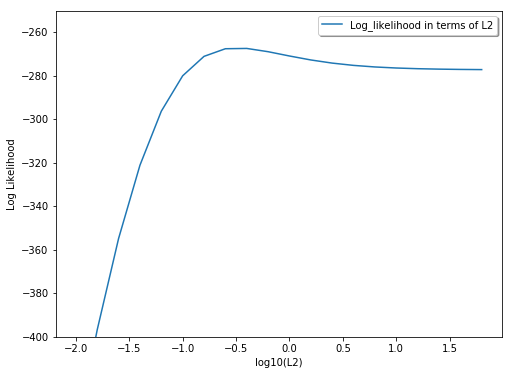

In [64]:
L2=np.array([10.0**i for i in np.arange(-2,2,0.2)])
L_LH=np.zeros(len(L2))
for i in range(len(L2)):
    L_LH[i]=LR_LLH(X_train_1,Y_train_1,X_val_1,Y_val_1,L2[i])
    
fig,ax1=plt.subplots(figsize=(8,6))
lines=locals()
lines['Log_likelihood in terms of L2'],=ax1.plot(np.log10(L2),L_LH,label='Log_likelihood in terms of L2')
ax1.set_ylabel('Log Likelihood')
ax1.set_xlabel('log10(L2)')
ax1.set_ylim([-400,-250])
legend=ax1.legend(loc='upper right',shadow=True)
#plt.xticks([range(2)],[lambda_max*0.8**i for i in np.arange(0,2,1)])
plt.show(block=False)

Choose $L2=10^{-0.5}$

#### 3.3.5

In [24]:
from sklearn.metrics import mean_absolute_error
import pandas as pd
def LR_Pred(theta,X):
    divider=1+np.exp(-np.dot(theta,X.T))
    Y_pred=1/divider
    Y_res_pred=np.dot(X,theta)
    Y_res_pred=np.where(Y_res_pred>0,1,0)
    return(Y_pred,Y_res_pred)
def Score_recorder(theta,X,y,r_min,r_max,r_step):
    (Y_pred,Y_res_pred)=LR_Pred(theta,X)
    Y_all=np.insert(Y_pred.reshape(-1,1),1,values=y,axis=1)
    Y_all=np.insert(Y_all,2,values=Y_res_pred,axis=1)
    print(Y_all)
    Y_all=pd.DataFrame(Y_all,index=range(len(Y_all)),columns=['prob','Y','res'])
    scores=[]
    p_error=[]
    for i in np.arange(r_min,r_max,r_step):
        j=i+r_step
        print(len(Y_all[Y_all['prob']>i][Y_all['prob']<=j].loc[:,'Y']))
        scores.append(np.mean(Y_all[Y_all['prob']>i][Y_all['prob']<=j].loc[:,'Y'])*100)
        p_error.append(mean_absolute_error(Y_all[Y_all['prob']>i][Y_all['prob']<=j].loc[:,'Y'],Y_all[Y_all['prob']>i][Y_all['prob']<=j].loc[:,'res']))
    return(scores,p_error)

In [25]:
(Scores,error)=Score_recorder(theta,X_val_1,Y_val,0.25,0.8,0.05)

[[ 0.44845628  0.          0.        ]
 [ 0.57212231  1.          1.        ]
 [ 0.39184278  0.          0.        ]
 ..., 
 [ 0.45927926  0.          0.        ]
 [ 0.4695004   1.          0.        ]
 [ 0.34128569  0.          0.        ]]
1
7
37
90
108
45
39
38
20
12
3


C:\Applications\Programming\Anaconda\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Applications\Programming\Anaconda\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Applications\Programming\Anaconda\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [32]:
error=[i*0.6 for i in error]

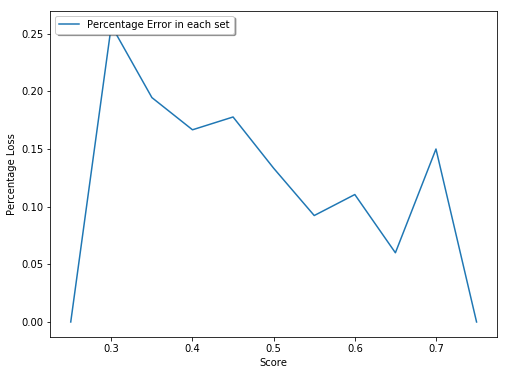

In [33]:
fig,ax1=plt.subplots(figsize=(8,6))
lines=locals()
lines['Percentage Error in each set'],=ax1.plot(np.arange(0.25,0.8,0.05),error,label='Percentage Error in each set')
ax1.set_ylabel('Percentage Loss')
ax1.set_xlabel('Score')
legend=ax1.legend(loc='upper left',shadow=True)
#plt.xticks([range(2)],[lambda_max*0.8**i for i in np.arange(0,2,1)])
plt.show(block=False)

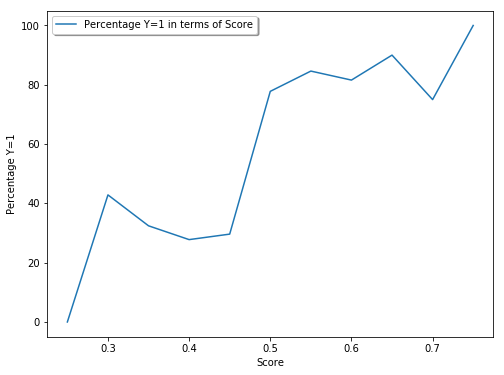

In [81]:
fig,ax1=plt.subplots(figsize=(8,6))
lines=locals()
lines['Percentage Y=1 in terms of Score'],=ax1.plot(np.arange(0.25,0.8,0.05),Scores,label='Percentage Y=1 in terms of Score')
ax1.set_ylabel('Percentage Y=1')
ax1.set_xlabel('Score')
legend=ax1.legend(loc='upper left',shadow=True)
#plt.xticks([range(2)],[lambda_max*0.8**i for i in np.arange(0,2,1)])
plt.show(block=False)

Conclusion: it is reasonable to use $f(x)$ as the indicator of probability that $y=1$. However, since the scale of $w$ is variable, we can use different scale for the score with different $w$. For this instance, when $f(x)<0.2$ the probability of $y=1$ is $0$ while when $f(x)>0.8$ it's $1$.

### 4. Bayesian Logistic Regression with Gaussian Priors

#### 4.1 
$$P(D'|w)=exp(-NLL)$$

Based on Conditional Probability Formula, we have:

$$P(w|D')=\frac{P(D'|w)P(w)}{P(D)}=\frac{exp(-NLL_{D'}(w))P(w)}{P(D)}$$

in which $P(w)$ is the prior density, and $P(D)$ is irrelevant to $w$.

#### 4.2 
Consider the negative log posterior of $w$:

$$-log(P(w|D'))=NLL-log(P(w))+log(P(D))$$

As $\frac{1}{n}NLL$ is equivalent to the regression item in LR, $log(P(D))$ is constant, we shall give $-logP(w)$ same distribution as the regularization item in LR. Based on the expression of multivaiate normal distribution, we get:

$$-log(P(w))=-\frac{1}{2}log((2n)^n|\Sigma|)+\frac{1}{2}w^{T}\Sigma^{-1}w\sim\lambda{w}^{T}w$$

Since the first item is not related to $w$, we make the second item and right side equal.

$$\frac{1}{2}w^{T}\Sigma^{-1}w=n\lambda{w}^{T}w$$

So we can make $\Sigma$ a diagonal matrix and each item in its diagonal is $\frac{1}{2n\lambda}$, so that the equation holds.

#### 4.3
For a $\Sigma=I$, to make LR equivalent to the prior distribution of $w$, we can make $\frac{1}{2n\lambda}=1$, so $\lambda=\frac{1}{2n}$.

### 5. Bayesian Linear Regression
#### 5.1

In [95]:
from __future__ import division

import matplotlib.pyplot as plt
import numpy.matlib as matlib
from scipy.stats import multivariate_normal
import numpy as np
import support_code

In [187]:
def likelihood_func(w, X, y_train, likelihood_var):
    '''
    Implement likelihood_func. This function returns the data likelihood
    given f(y_train | X; w) ~ Normal(Xw, likelihood_var).

    Args:
        w: Weights
        X: Training design matrix with first col all ones (np.matrix)
        y_train: Training response vector (np.matrix)
        likelihood_var: likelihood variance

    Returns:
        likelihood: Data likelihood (float)
    '''

    #TO DO
    num_ins=X.shape[0]
    likelihood=1.0
    #likelihood=multivariate_normal.pdf(y_train, np.dot(X,w), likelihood_var)
    for i in range(num_ins):
        ml=multivariate_normal.pdf(y_train[i], np.dot(X[i],w), likelihood_var)
        likelihood*=ml
    #likelihood=0.99
    return likelihood

In [179]:
def get_posterior_params(X, y_train, prior, likelihood_var = 0.2**2):
    '''
    Implement get_posterior_params. This function returns the posterior
    mean vector \mu_p and posterior covariance matrix \Sigma_p for
    Bayesian regression (normal likelihood and prior).

    Note support_code.make_plots takes this completed function as an argument.

    Args:
        X: Training design matrix with first col all ones (np.matrix)
        y_train: Training response vector (np.matrix)
        prior: Prior parameters; dict with 'mean' (prior mean np.matrix)
               and 'var' (prior covariance np.matrix)
        likelihood_var: likelihood variance- default (0.2**2) per the lecture slides

    Returns:
        post_mean: Posterior mean (np.matrix)
        post_var: Posterior mean (np.matrix)
    '''

    # TO DO
    #print(prior['var'])
    #print(X.shape)
    #print(y_.shape)
    mean_MP=np.linalg.inv(np.dot(X.T,X)+likelihood_var*np.linalg.inv(prior['var']))
    post_mean=np.dot(np.dot(mean_MP,X.T),y_train)
    post_var=np.linalg.inv(1/likelihood_var*np.dot(X.T,X)+np.linalg.inv(prior['var']))
    return post_mean, post_var

In [183]:
def get_predictive_params(X_new, post_mean, post_var, likelihood_var = 0.2**2):
    '''
    Implement get_predictive_params. This function returns the predictive
    distribution parameters (mean and variance) given the posterior mean
    and covariance matrix (returned from get_posterior_params) and the
    likelihood variance (default value from lecture).

    Args:
        X_new: New observation (np.matrix object)
        post_mean, post_var: Returned from get_posterior_params
        likelihood_var: likelihood variance (0.2**2) per the lecture slides

    Returns:
        - pred_mean: Mean of predictive distribution
        - pred_var: Variance of predictive distribution
    '''

    # TO DO
    pred_mean=np.dot(post_mean.T,X_new)
    pred_var=np.sqrt(np.dot(np.dot(X_new.T,post_var),X_new)+likelihood_var)
    return pred_mean, pred_var


In [178]:
from __future__ import division

import matplotlib.pyplot as plt
import numpy.matlib as matlib
from scipy.stats import multivariate_normal
import numpy as np

'''
This is support code provided for the Bayesian Regression Problems.
The goal of this problem is to have you explore Bayesian Linear Gaussian Regression, as described in Lecture.
In particular, the goal is to reproduce fig 3.7 from Bishop's book.

A few things to note about this code:
    - We strongly encourage you to review this support code prior to
      completing "problem.py"
    - For Problem (b), you are asked to generate plots for three
      values of sigma_squared. We suggest you save the plot generated
      by make_plots (instead of simply calling plt.show)
'''

def generate_data(data_size, noise_params, actual_weights):
    # x1: from [0,1) to [-1,1)
    x1 = -1 + 2 * np.random.rand(data_size, 1)
    # appending the bias term
    xtrain = np.matrix(np.c_[np.ones((data_size, 1)), x1])
    # random noise
    noise = np.matrix(np.random.normal(
                      noise_params["mean"],
                      noise_params["var"],
                      (data_size, 1)))

    ytrain = (xtrain * actual_weights) + noise

    return xtrain, ytrain

def make_plots(actual_weights, xtrain, ytrain, likelihood_var, prior, likelihood_func, get_posterior_params, get_predictive_params):

    # #setup for plotting
    #
    show_progress_till_data_rows = [1, 2, 10, -1]
    num_rows = 1 + len(show_progress_till_data_rows)
    num_cols = 4
    plt.figure(figsize=(10,10))
    plt.subplots_adjust(hspace=.8, wspace=.8)

    plot_without_seeing_data(prior, num_rows, num_cols)

    # see data for as many rounds as specified and plot
    for round_num, row_num in enumerate(show_progress_till_data_rows):
        current_row = round_num + 1
        first_column_pos = (current_row * num_cols) + 1

        # #plot likelihood on latest point
        plt.subplot(num_rows, num_cols, first_column_pos)


        likelihood_func_with_data = lambda W: likelihood_func(W,
                                                      xtrain[:row_num,],
                                                      ytrain[:row_num],
                                                      likelihood_var)
        contour_plot(likelihood_func_with_data, actual_weights)

        # plot updated posterior on points seen till now
        x_seen = xtrain[:row_num]
        #print(x_seen.shape,'one')
        y_seen = ytrain[:row_num]
        #print(y_seen.shape,'one')
        mu, cov = get_posterior_params(x_seen, y_seen,
                                      prior, likelihood_var)
        posterior_distr = multivariate_normal(mu.T.tolist()[0], cov)
        posterior_func = lambda x: posterior_distr.pdf(x)
        plt.subplot(num_rows, num_cols, first_column_pos + 1)
        contour_plot(posterior_func, actual_weights)

        # plot lines
        data_seen = np.c_[x_seen[:, 1], y_seen]
        plt.subplot(num_rows, num_cols, first_column_pos + 2)
        plot_sample_lines(mu, cov, data_points=data_seen)

        # plot predictive
        plt.subplot(num_rows, num_cols, first_column_pos + 3)
        post_mean, post_var = get_posterior_params(x_seen, y_seen, prior)
        plot_predictive_distribution(get_predictive_params, post_mean, post_var)

    # #show the final plot
    plt.show()

def plot_without_seeing_data(prior, num_rows, num_cols):

    #Blank likelihood
    plt.subplot(num_rows, num_cols, 1, facecolor='grey')
    plt.title("Likelihood")
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks([])
    plt.yticks([])
    plt.xlim([-0.9, 0.9])
    plt.ylim([-0.9, 0.9])

    #Prior
    prior_distribution = multivariate_normal(mean=prior["mean"].T.tolist()[0],
        cov=prior["var"])
    prior_func = lambda x:prior_distribution.pdf(x)
    plt.subplot(num_rows, num_cols, 2)
    plt.title("Prior/Posterior")
    contour_plot(prior_func)

    # Plot initially valid lines (no data seen)
    plt.subplot(num_rows, num_cols, 3)
    plt.title("Data Space")
    plot_sample_lines(prior["mean"], prior["var"])

    # Blank predictive
    plt.subplot(num_rows, num_cols, 4, facecolor='grey')
    plt.title('Predictive Distribution')
    plt.xticks([])
    plt.yticks([])
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.xlabel("")
    plt.ylabel("")

def contour_plot(distribution_func, actual_weights=[]):

    step_size = 0.05
    array = np.arange(-1, 1, step_size)
    x, y_train = np.meshgrid(array, array)

    length = x.shape[0] * x.shape[1]
    x_flat = x.reshape((length, 1))
    y_flat = y_train.reshape((length, 1))
    contour_points = np.c_[x_flat, y_flat]

    values = list(map(distribution_func, contour_points))
    values = np.array(values).reshape(x.shape)

    plt.contourf(x, y_train, values)
    plt.xlabel("w1")
    plt.ylabel("w2")
    plt.xticks([-0.5, 0, 0.5])
    plt.yticks([-0.5, 0, 0.5])
    plt.xlim([-0.9, 0.9])
    plt.ylim([-0.9, 0.9])

    if(len(actual_weights) == 2):
        plt.plot(float(actual_weights[0]), float(actual_weights[1]),
                 "*k", ms=5)

# Plot the specified number of lines of the form y_train = w0 + w1*x in [-1,1]x[-1,1] by
# drawing w0, w1 from a bivariate normal distribution with specified values
# for mu = mean and sigma = covariance Matrix. Also plot the data points as
# circles.
def plot_sample_lines(mean, variance,
                    number_of_lines=6,
                    data_points=np.empty((0, 0))):
    step_size = 0.05
    # generate and plot lines
    for round in range(1, number_of_lines):
        weights = np.matrix(np.random.multivariate_normal(mean.T.tolist()[0], variance)).T
        x1 = np.arange(-1, 1, step_size)
        x = np.matrix(np.c_[np.ones((len(x1), 1)), x1])
        y_train = x * weights

        plt.plot(x1, y_train)

    # markings
    plt.xticks([-1, 0, 1])
    plt.yticks([-1, 0, 1])
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.xlabel("x")
    plt.ylabel("y")

    # plot data points if given
    if(data_points.size):
        plt.plot(data_points[:, 0], data_points[:, 1],
                 "co")

def plot_predictive_distribution(get_predictive_params,post_mean, post_var):
    step_size = 0.05
    x = np.arange(-1, 1, step_size)
    x = np.matrix(np.c_[np.ones((len(x), 1)), x])
    pred_means = np.zeros(x.shape[0])
    pred_stds = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        pred_means[i], pred_stds[i] = get_predictive_params(x[i,].T,
                                                        post_mean,
                                                        post_var)
    pred_stds = np.sqrt(pred_stds)
    plt.plot(x[:,1], pred_means, 'b')
    plt.plot(x[:,1], pred_means + pred_stds, 'b--')
    plt.plot(x[:,1], pred_means - pred_stds, 'b--')
    plt.xticks([-1, 0, 1])
    plt.yticks([-0.5, 0, 0.5])
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.xlabel("x")
    plt.ylabel("y")


(40, 2)


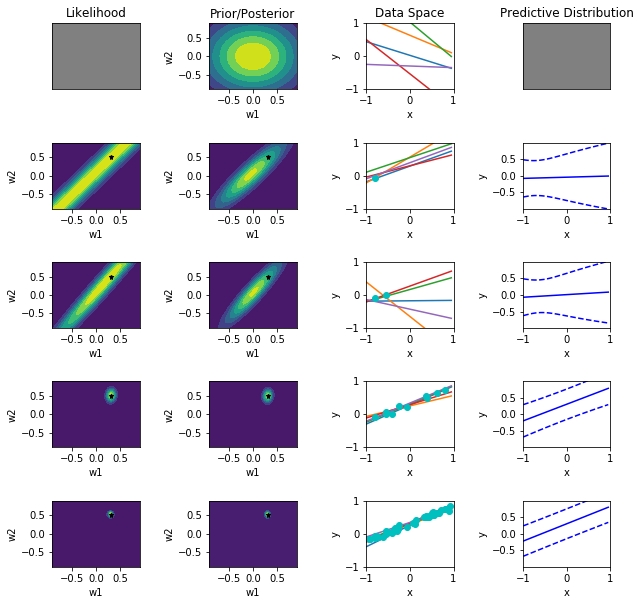

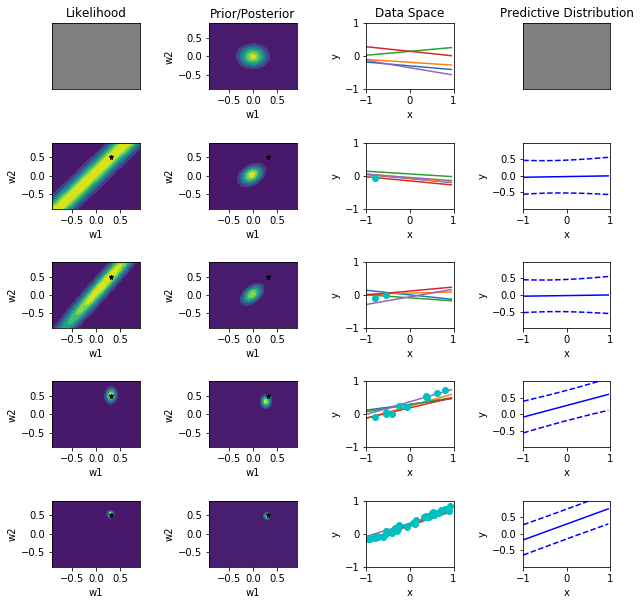

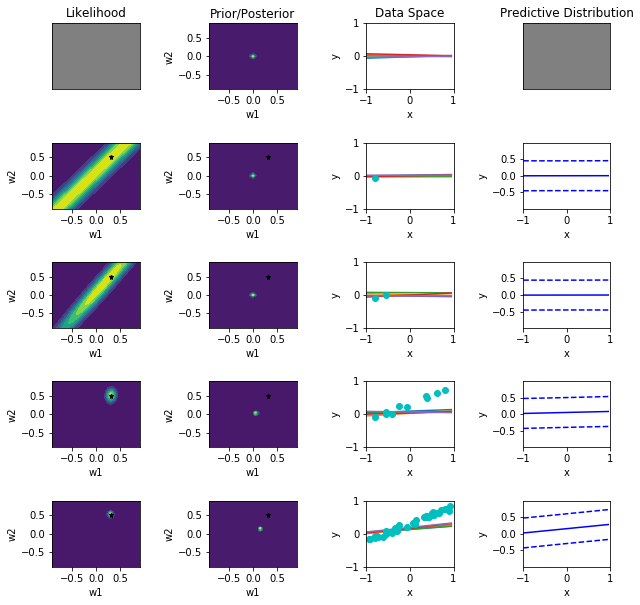

In [188]:
from __future__ import division

import matplotlib.pyplot as plt
import numpy.matlib as matlib
from scipy.stats import multivariate_normal
import numpy as np
import support_code

if __name__ == '__main__':

    '''
    If your implementations are correct, running
        python problem.py
    inside the Bayesian Regression directory will, for each sigma in sigmas_to-test generates plots
    '''

    np.random.seed(46134)
    actual_weights = np.matrix([[0.3], [0.5]])
    data_size = 40
    noise = {"mean":0, "var":0.2 ** 2}
    likelihood_var = noise["var"]
    xtrain, ytrain = generate_data(data_size, noise, actual_weights)
    print(xtrain.shape)

    #Question (b)
    sigmas_to_test = [1/2, 1/(2**5), 1/(2**10)]
    for sigma_squared in sigmas_to_test:
        prior = {"mean":np.matrix([[0], [0]]),
                 "var":matlib.eye(2) * sigma_squared}

        make_plots(actual_weights,
                            xtrain,
                            ytrain,
                            likelihood_var,
                            prior,
                            likelihood_func,
                            get_posterior_params,
                            get_predictive_params)

#### 5.5

Both Likelihood and Posterior Function shrinks with sample size increases(gets lower variance), and Posterior Prediction Distribution tends to have a more stable range of variance. With the strength of prior decreasing, Likelihood seems unaffected, the Posterior shows more bias, while the Posterior Prediction Distribution also shows more stable range of variance.

#### 5.6

In [199]:
from sklearn.linear_model import Ridge
tp=Ridge(alpha=1.0)
tp.fit(xtrain[:,1].reshape(-1, 1), ytrain)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [200]:
tp.coef_

array([[ 0.49085924]])

In [201]:
tp.intercept_

array([ 0.30234476])

I used $1$ for regularization coef. Since the problem needs the Ridge correspond to the first prior covariance which is $\frac{1}{2}$, based on the expression $\lambda=\frac{1}{2\sigma^{2}}$, we can get $\lambda=1$